In [6]:
import geopandas as gpd
gpd.__version__

'1.1.2'

In [10]:
### Get data from Arcgis pro
railways = gpd.read_file(r"C:\Users\sinan\OneDrive\Documents\ArcGIS\Projects\hamburg\hamburg.gdb", layer= "gis_osm_railways_free_1")

In [12]:
railways.head()

,osm_id,code,fclass,name,layer,bridge,tunnel,Shape_Length,geometry
0,2588600,6102,light_rail,,0.0,F,F,869.372735,"MULTILINESTRING ((557065.357 5925321.027, 5571..."
1,2703995,6101,rail,Hafenbahn,0.0,F,F,743.575028,"MULTILINESTRING ((559972.116 5925192.87, 55990..."
2,4221091,6101,rail,Vogelfluglinie,1.0,T,F,25.225384,"MULTILINESTRING ((568715.339 5935161.944, 5687..."
3,4389117,6101,rail,Hafenbahn,0.0,F,F,819.218616,"MULTILINESTRING ((559596.151 5925741.048, 5596..."
4,4389118,6101,rail,Hafenbahn,1.0,T,F,33.001629,"MULTILINESTRING ((559590.753 5925708.491, 5595..."


In [16]:
from shapely import Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon 

In [14]:
point1 = Point(1,0)

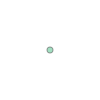

In [19]:
point1

In [17]:
line1 = LineString([
    (1,0), (5,8), (10,100)
])

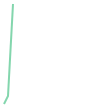

In [18]:
line1

In [20]:
print(line1)

LINESTRING (1 0, 5 8, 10 100)


In [26]:
line1.length

101.08004129409883

In [21]:
polygon1 = Polygon([
    (0,0), (1,0), (1,1)
])

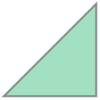

In [22]:
polygon1

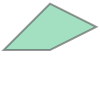

In [24]:
polygon2 = Polygon([
    (0,0), (1,0), (2,0.5) ,(1,1)
])
polygon2

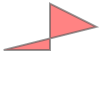

In [25]:
polygon3 = Polygon([
    (0,0), (1,0), (1,1), (2,0.5)
])
polygon3

In [28]:
polygon1.area

0.5